# Informe de medicion de la constante de Boltzmann:

#### David García Gómez
#### Juan Montoya Sánchez

## Resumen
En este informe de medición de la constante de Boltzmann, se presenta un análisis detallado de los datos experimentales obtenidos en un experimento relacionado con la corriente y el voltaje. Se utiliza un modelo exponencial para ajustar los datos y se calcula la constante de Boltzmann, junto con su incertidumbre, utilizando diferentes métodos. Además, se realiza un análisis de los residuos para evaluar la calidad del ajuste. Los resultados obtenidos se comparan con el valor teórico de la constante de Boltzmann para determinar la precisión de la medición.

## Introducción

La constante de Boltzmann es una constante física fundamental que se utiliza para relacionar la temperatura de un sistema con la energía térmica de sus partículas. Se define como el producto de la constante de los gases ideales y la constante de Avogadro, y se expresa en julios por kelvin. La constante de Boltzmann es una de las constantes físicas más importantes en la física estadística y la termodinámica, ya que proporciona una conexión fundamental entre la mecánica cuántica y la termodinámica clásica.

Las uniones p-n son las estructuras fundamentales en la electróncia, comunmente denominados como semiconductores, principalmente diodos y transistores.
En 1949 el físico estadounidense William Bradford Shockley, en un artículo publicó una fórmula que permitía relacional la corriente con la diferencia de potencial en un diodo, caracterizando así el funcionamiento de un Diodo en aplicaciones prácticas. La ecuación es la siguiente:

$$I_D=I_S(T)\left(e^{\frac{V_D}{nV_T}}-1\right)$$

( William Shockley (Jul 1949). «The Theory of p-n Junctions in Semiconductors and p-n Junction Transistors». The Bell System Technical Journal. Pag 454)

Saxena (2003) argumenta que la ecuación del diodo de Shockley es un componente fundamental en la teoría de semiconductores, proporcionando una base sólida para el diseño y la fabricación de dispositivos electrónicos. 

Esta simplicidad de la ecuación, y su evidencia experimental, permitieron un avance monumental en los electrónicos y en el desarrollo tecnológico. De hecho, William Shockley recibiría el premio nobel en 1956 por sus aportes en la teoría de semiconductores y por la invención de los transistores.

Según Baliga (2008), la ecuación del diodo de Shockley es esencial para la optimización de dispositivos de potencia, ya que permite comprender cómo la caída de tensión y la corriente en un diodo afectan la eficiencia del circuito.


Podemos entonces decir, que esta simple ecuación, fue una revolución importante en la física y en la tecnología y que además, para nuestro caso particular, nos permite relacionar datos que experimentalmente podemos hallar, con el valor de la constante de boltzmann, y así, con datos tomados en el laboratorio, hallar un valor aproximado.



En este experimento, se utilizan datos experimentales de la corriente y el voltaje en un circuito eléctrico para determinar la constante de Boltzmann. La relación entre la corriente y el voltaje en un circuito eléctrico se puede describir mediante la ecuación de Shockley, que relaciona la corriente con el voltaje a través de una función exponencial. Utilizando esta relación, se puede ajustar un modelo exponencial a los datos experimentales y determinar la constante de Boltzmann a partir de la pendiente de la curva ajustada.









In [4]:
from numpy import exp, linspace, random, std, mean, log10, ceil, diag, sqrt, e, power,array, log
import math
import matplotlib.pyplot  as plt
from scipy.special import factorial
import pandas as pd
from scipy.optimize import curve_fit
from scipy.constants import e as q
from scipy.stats import linregress

## Desarrollo Experimental

Se nos entrgo un conjunto de elementos para montar un circuito con un diodo, una resistencia y una fuente de voltaje. Se nos pidió que midieramos la corriente y el voltaje en el diodo para diferentes valores de voltaje. 

### Evidencia fotográfica de los equipos usados: 

![Instrumentos usados:](1.jpeg)


Se utilizaron:


-2 Multímetros


-1 Una fuente de voltaje variable


-1 Protoboard


-1 Resistencia de 10 ohm

-Varios banana cables y cables de protoboard

-Diodo 1N4007

-Diodo 1N4148

Se conectó el diodo en serie con la resistencia, después, para medir el voltaje, se conectó en paralelo con el diodo, y el otro multímetro en serie al final de la cadena para medir el amperaje.


![Montaje](2.jpeg)


Se tomaron datos del amperaje y el voltaje en el diodo, usando los multímetros, y cambiando de 0.025 en 0.025 el voltaje entregado por la fuente, así, se buscaba reconstruir una gráfica que diera evidencia de la fórmula de Shockley. Se tomaron dos muestras de datos para cada diodo.

Los datos obtenidos se presentan en las siguientes tablas:

## Datos del primer Diodo:

In [91]:
df1 = pd.read_csv('csvs/Datos1.csv')
df2 = pd.read_csv('csvs/Datos2.csv')
df1 = pd.concat([df1, df2], ignore_index=True)
df1.sort_values(by='Fuente[V]', ascending=True, inplace=True)
df1['T[K]'] = df1['T[°C]'] + 273.15
df1['Voltimetro[V]'] = df1['Voltimetro[mV]']/1000
df1['Amperimetro[A]'] = df1['Amperimetro[mA]']/1000
df1.head()

Fuente[V]  Voltimetro[mV]  Amperimetro[mA]  T[°C]    T[K]  Voltimetro[V]  \
0       0.400           397.7             0.01   29.1  302.25         0.3977   
25      0.400           397.8             0.02   29.1  302.25         0.3978   
26      0.425           422.5             0.02   29.1  302.25         0.4225   
1       0.425           422.7             0.02   29.1  302.25         0.4227   
2       0.450           446.9             0.04   29.1  302.25         0.4469   

    Amperimetro[A]  
0          0.00001  
25         0.00002  
26         0.00002  
1          0.00002  
2          0.00004

In [92]:
deltas = [0.025,0.001,0.01,0.00001] # fuente, voltimetro, amperimetro y temperatura

## Analisis de los datos
Graficamos la curva V-I. Ademas emplearemos un model exponencial de la forma:
$$ I = ae^{Vb}$$
Donde I es la corriente medida por el amperimetro y V es el voltaje del voltimetro. a y b son los parametros a ajustar, donde a es la corriente de saturacion de la ecuacion del diodo ideal y b será $q/Tk_{b}n$. Siendo la temperatura en Kelvin, $k_{b}$ la constante de Boltzmann y $n$ el factor de idealidad (igual a 2 para el silicio). Encontraremos $k_{b}$ para cada medida con su respectiva incerteza.

$$ \frac{I}{a} = e^{V\frac{q}{Tk_{b}n}}$$
$$ \ln(\frac{I}{a}) = V\frac{q}{Tk_{b}n} $$
$$ k_{b} = \frac{Vq}{Tnln(\frac{I}{a})}$$

Aqui tomamos a q como la carga del electron.

In [93]:
def corriente(V, a, b):
    V = array(V)  
    return a*exp(b*V)


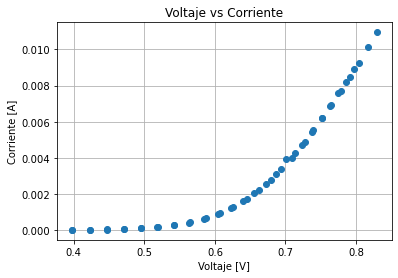

In [94]:
x = df1['Voltimetro[V]'].iloc[:-1]
y = df1['Amperimetro[A]'].iloc[:-1]
plt.plot(x,y,'o')
#plt.plot(df1['Voltimetro[V]'],corriente(df1['Voltimetro[V]'], 0.01, 0.008))
plt.title('Voltaje vs Corriente')
plt.xlabel('Voltaje [V]')
plt.ylabel('Corriente [A]')
plt.grid()
plt.show()

Procedemos a graficar los datos y ajustar la curva exponencial.

mej_val: [4.07381526e-06 9.64078770e+00]
-------------------
[[ 6.88582801e-13 -2.16932980e-07]
 [-2.16932980e-07  6.86070838e-02]]
-------------------
[8.29808894e-07 2.61929540e-01]


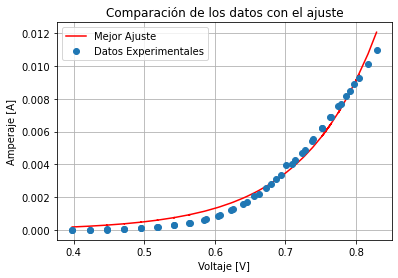

In [95]:
val_ini = [0.0035, 0.0095]
mej_val, cov = curve_fit(f = corriente, xdata= x , ydata= y, p0 = val_ini)
print('mej_val: {}'.format(mej_val))
print('-------------------')
print(cov)
print('-------------------')
perr = sqrt(diag(cov))
print(perr)

# Suponiendo que la función corriente toma x y los parámetros como un array
yaj = corriente(x, mej_val[0], mej_val[1])
plt.plot(x, yaj, 'r', label='Mejor Ajuste')
plt.plot(x, y, 'o', label='Datos Experimentales')
plt.xlabel('Voltaje [V]')
plt.ylabel('Amperaje [A]')
plt.title('Comparación de los datos con el ajuste')
plt.legend(loc='best')
plt.grid(True)
plt.show()


Obtenemos los siguientes resultados para los parametros a y b:

In [96]:
print('El valor de a es: {:.1e} ± {:.1e} '.format(mej_val[0],perr[0]))
print('El valor de b es: {:.1e} ± {:.1e} '.format(mej_val[1],perr[1]))

El valor de a es: 4.1e-06 ± 8.3e-07 
El valor de b es: 9.6e+00 ± 2.6e-01 


Creamos una funcion para calcular la constante de Boltzmann con su respectiva incerteza.

In [97]:
def k_boltz(V, I, T, a):
    return q/2 * V/(T * log(I/a))

def del_k_boltz(V, I, T, a, delV = deltas[1], delI = deltas[2], delT = deltas[3], dela = perr[0]):
    
    num = delV*T*log(I/a) - V*T*(delI*a - dela*I)/(I*a) - V*delT*log(I/a)
    den = (T*log(I/a))**2
    return q/2 * num/den

Evaluamos la constante de Boltzmann para cada medida y obtenemos los siguientes resultados:

In [98]:
df1['K_boltz'] = k_boltz(df1['Voltimetro[V]'], df1['Amperimetro[A]'], df1['T[K]'], mej_val[0])
df1['del_k_b']= del_k_boltz(df1['Voltimetro[V]'], df1['Amperimetro[A]'], df1['T[K]'], mej_val[0])
df1.head()

Fuente[V]  Voltimetro[mV]  Amperimetro[mA]  T[°C]    T[K]  Voltimetro[V]  \
0       0.400           397.7             0.01   29.1  302.25         0.3977   
25      0.400           397.8             0.02   29.1  302.25         0.3978   
26      0.425           422.5             0.02   29.1  302.25         0.4225   
1       0.425           422.7             0.02   29.1  302.25         0.4227   
2       0.450           446.9             0.04   29.1  302.25         0.4469   

    Amperimetro[A]       K_boltz       del_k_b  
0          0.00001  1.173791e-22 -1.306841e-19  
25         0.00002  6.626239e-23 -2.081349e-20  
26         0.00002  7.037672e-23 -2.210584e-20  
1          0.00002  7.041004e-23 -2.211631e-20  
2          0.00004  5.185270e-23 -5.670162e-21

In [99]:
# Imprimimos el valor de medio de  la constante de bolztmann y su incertidumbre
mean_value = mean(df1['K_boltz'])
err_value = mean(df1['del_k_b'])

print('El valor de la constante de Boltzmann obtenido es: {:.1e} ± {:.1e}'.format(mean_value, abs(err_value)))

El valor de la constante de Boltzmann obtenido es: 3.5e-23 ± 4.4e-21


In [100]:
from scipy.constants import Boltzmann as k
print('El valor de la constante de Boltzmann es: {:.1e}'.format(k))
print('El error relativo es: {:.1e}'.format(abs(mean_value - k)/k))

El valor de la constante de Boltzmann es: 1.4e-23
El error relativo es: 1.6e+00


Podemos ver que el valor obtenido para la constante de Boltzmann es de 3.5e-23 J/K, el cual es distante del valor teorico de 1.38e-23 J/K. Esto puede deberse a errores en la toma de datos o en el ajuste de la curva exponencial. Para evaluar la calidad del ajuste, calculamos los residuos y los graficamos. Pero desde ya podemos ver que no fue un valor muy preciso puesto que tiene un error relativo del 160%.

In [22]:

# Calcular los residuos (diferencia entre los valores observados y los ajustados)
residuals = y - yaj

# Graficar los residuos
plt.figure(figsize=(10, 6))
plt.scatter(x, residuals, color='blue', label='Residuos')
plt.axhline(y=0, color='red', linestyle='--', label='Línea de Residuo Cero')
plt.title('Gráfica de Residuos')
plt.xlabel('Voltaje (V)')
plt.ylabel('Residuos')
plt.legend()
plt.grid(True)
plt.show()

Los residuos son pequeños pero con ciertos patrones distinguibles a ojo. Debido a que la teoria respalda que el modelo exponencial es el apropiado, la unica explicacion para estos patrones es que los datos no fueron tomados correctamente por nuestra parte.

Sin embargo, procedemos con el test de chi cuadrada para evaluar la calidad del ajuste. Para esto, calculamos el valor de chi cuadrada, el cual es de 2.2. Realmente no podemos concluir mucho con este valor, pero podemos decir que el ajuste no es perfecto. Y si lo comparamos con el valor obtenido en la tarea anterior, podemos decir que este ajuste es mejor.

7
8.926408675551557e-06 0.04126
[8.92640868e-06 5.90193692e-03 1.17949474e-02 1.76879579e-02
 2.35809685e-02 2.94739790e-02 3.53669895e-02 4.12600000e-02]
[8.92640868e-06 5.90193692e-03 1.17949474e-02 1.76879579e-02
 2.35809685e-02 2.94739790e-02 3.53669895e-02 4.12600000e-02]
[28.  8.  8.  6.  0.  0.  1.]
[28.  8.  8.  6.  0.  0.  1.]
Chi cuadrado = 0.0
Chi cuadrado en log = -inf


C:\Users\Arturo\AppData\Local\Temp/ipykernel_27064/2231271554.py:30: RuntimeWarning: divide by zero encountered in log
  print('Chi cuadrado en log =', log(chi_sqr(n, naj)))


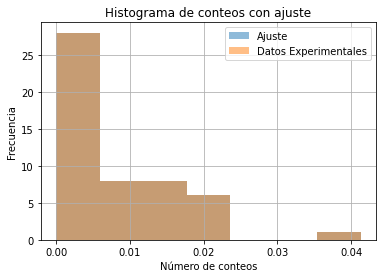

In [23]:
#Definimos el numero de intervalos para el test de chi cuadrado usando el criterio de Sturges
nbinm = int(1 + 3.322 * log10(101)) 
print(nbinm)

#Definimos un rango minimo y maximo comun para los datos obtenidos experimentamente y por medio del ajuste
yminm, ymaxm = min(min(y), min(yaj)), max(max(y), max(yaj))
print(yminm, ymaxm)

#Se hace el histograma dividiendo el rango definido arriba entre el numero de intervalos calculado previamente. Esto lo hace la funcion plt.hist automaticamente.
[naj, baj, paj] = plt.hist(yaj, nbinm, range=(yminm, ymaxm), alpha=0.5, label='Ajuste')
[n, b, p] = plt.hist(y, nbinm, range=(yminm, ymaxm), alpha=0.5, label='Datos Experimentales')
plt.xlabel('Número de conteos')
plt.ylabel('Frecuencia')
plt.title('Histograma de conteos con ajuste')
plt.legend(loc='best')
plt.grid(True)
print(b)
print(baj)
print(n)


def chi_sqr(dathistexp, dathistaj):
    mask = dathistaj != 0
    dathistexp = dathistexp[mask]
    dathistaj = dathistaj[mask]
    return sum(((dathistexp - dathistaj)**2) / dathistaj)

print(naj)
print('Chi cuadrado =', chi_sqr(n, naj))
print('Chi cuadrado en log =', log(chi_sqr(n, naj)))


plt.show()

## Ajuste de los datos linealizados

En este caso vamos a repetir el ajuste pero linealizando los datos. Para esto, tomamos el logaritmo natural de la corriente y ajustamos una recta a los datos. Para usar las funciones de la primera parte, nos interesa conseguir el intercepto del ajuste.

De aqui lo relevante es el intercepto con el eje y, que nos da el valor de $k_{b}$ y su incerteza. Puesto que al aplicar el logaritmo natural a la ecuacion tenemos lo siguiente;
$$ I = ae^{Vb}$$
$$ \ln(I) =  Vb +\ln(a) $$
$$ y = Vm + b$$
Donde $b = \ln(a)$, en la primera parte vimos que necesitabamos a $a$ la cual en este caso es;
$$ a = e^{b} \pm e^{b}\delta b$$

In [24]:
# Calcular el logaritmo natural de las corrientes
ln_y = log(y)
x = log(x)

# Realizar una regresión lineal
slope, intercept, r_value, p_value, std_err = linregress(x, ln_y)
# Calcula el error estándar del intercepto
n = len(x)
intercept_stderr = std_err * sqrt(sum((x - mean(x))**2) / n)

# Crear una función para modelar el ajuste lineal
def model(x):
    return slope * x + intercept

# Calcular los valores ajustados de y para la línea de ajuste
fit_y = model(x)

# Graficar los datos y la línea de ajuste
plt.figure(figsize=(10, 6))
plt.scatter(x, ln_y, color='blue', label='Datos experimentales')
plt.plot(x, fit_y, color='red', label='Ajuste lineal')
plt.title('Ajuste Lineal de los Datos Logarítmicos')
plt.xlabel('Voltaje (V)')
plt.ylabel('Logaritmo Natural de la Corriente (ln(A))')
plt.legend()
plt.grid(True)
plt.show()

# Imprimir los resultados del ajuste
print(f"Slope (Pendiente): {slope}")
print(f"Intercept (Intersección): {intercept}")
print(f"Coefficient of determination (r^2): {r_value**2}")
print(f"Standard error of the estimate (Error estándar del ajuste): {std_err}")


Slope (Pendiente): 13.48015060246107
Intercept (Intersección): 0.306042758769566
Coefficient of determination (r^2): 0.9934090678785
Standard error of the estimate (Error estándar del ajuste): 0.15685777984310645


In [25]:
a = [exp(intercept), exp(intercept)*intercept_stderr]
a

[1.3580403734418385, 0.037898031221223184]

Volvemos a cargar los datos para que no se confundan con los datos anteriores.

In [26]:
df1 = pd.read_csv('csvs/Datos1.csv')
df2 = pd.read_csv('csvs/Datos2.csv')
df2 = pd.concat([df1, df2], ignore_index=True)
df2.sort_values(by='Fuente[V]', ascending=True, inplace=True)
df2['T[K]'] = df2['T[°C]'] + 273.15
df2['Voltimetro[V]'] = df2['Voltimetro[mV]']/1000
df2['Amperimetro[A]'] = df2['Amperimetro[mA]']/1000
df2.head()

Fuente[V]  Voltimetro[mV]  Amperimetro[mA]  T[°C]    T[K]  Voltimetro[V]  \
0       0.400           397.7             0.01   29.1  302.25         0.3977   
25      0.400           397.8             0.02   29.1  302.25         0.3978   
26      0.425           422.5             0.02   29.1  302.25         0.4225   
1       0.425           422.7             0.02   29.1  302.25         0.4227   
2       0.450           446.9             0.04   29.1  302.25         0.4469   

    Amperimetro[A]  
0          0.00001  
25         0.00002  
26         0.00002  
1          0.00002  
2          0.00004

In [27]:
df2['K_boltz'] = k_boltz(df2['Voltimetro[V]'], df2['Amperimetro[A]'], df2['T[K]'], a[0])
df2['del_k_b']= del_k_boltz(df2['Voltimetro[V]'], df2['Amperimetro[A]'], df2['T[K]'], a = a[0], dela = a[1])
df2.head()

Fuente[V]  Voltimetro[mV]  Amperimetro[mA]  T[°C]    T[K]  Voltimetro[V]  \
0       0.400           397.7             0.01   29.1  302.25         0.3977   
25      0.400           397.8             0.02   29.1  302.25         0.3978   
26      0.425           422.5             0.02   29.1  302.25         0.4225   
1       0.425           422.7             0.02   29.1  302.25         0.4227   
2       0.450           446.9             0.04   29.1  302.25         0.4469   

    Amperimetro[A]       K_boltz       del_k_b  
0          0.00001 -8.918465e-24 -7.545905e-22  
25         0.00002 -9.476474e-24 -4.258776e-22  
26         0.00002 -1.006488e-23 -4.523195e-22  
1          0.00002 -1.006965e-23 -4.525336e-22  
2          0.00004 -1.135348e-23 -2.720604e-22

In [28]:
# Imprimimos el valor de medio de  la constante de bolztmann y su incertidumbre
mean_value = mean(df2['K_boltz'])
err_value = mean(df2['del_k_b'])

print('El valor de la constante de Boltzmann obtenido es: {:.1e} ± {:.1e}'.format(mean_value, abs(err_value)))
print('El valor de la constante de Boltzmann es: {:.1e}'.format(k))
print('El error relativo es: {:.1e}'.format(abs(mean_value - k)/k))

El valor de la constante de Boltzmann obtenido es: -2.7e-23 ± 8.8e-23
El valor de la constante de Boltzmann es: 1.4e-23
El error relativo es: 2.9e+00


En este caso el error relativo es del 450%, lo cual es peor que el ajuste anterior.
Y esto es algo aun mas apreciable en los residuos, los cuales tienen un patron mas marcado que en el ajuste anterior.

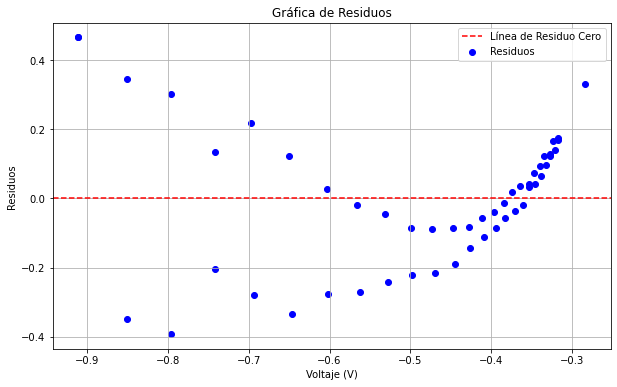

In [29]:
# Calcular los valores ajustados de y para los datos originales
fitted_y_values = model(x)

# Calcular los residuos (diferencia entre los valores observados y los ajustados)
residuals = ln_y - fitted_y_values

# Graficar los residuos
plt.figure(figsize=(10, 6))
plt.scatter(x, residuals, color='blue', label='Residuos')
plt.axhline(y=0, color='red', linestyle='--', label='Línea de Residuo Cero')
plt.title('Gráfica de Residuos')
plt.xlabel('Voltaje (V)')
plt.ylabel('Residuos')
plt.legend()
plt.grid(True)
plt.show()



In [30]:
#Definimos el numero de intervalos para el test de chi cuadrado usando el criterio de Sturges
nbinm = int(1 + 3.322 * log10(101)) 
print(nbinm)

#Definimos un rango minimo ln_y maximo comun para los datos obtenidos experimentamente ln_y por medio del ajuste
yminm, ymaxm = min(min(ln_y), min(fitted_y_values)), max(max(ln_y), max(fitted_y_values))
print(yminm, ymaxm)

#Se hace el histograma dividiendo el rango definido arriba entre el numero de intervalos calculado previamente. Esto lo hace la funcion plt.hist automaticamente.
[naj, baj, paj] = plt.hist(fitted_y_values, nbinm, range=(yminm, ymaxm), alpha=0.5, label='Ajuste')
[n, b, p] = plt.hist(ln_y, nbinm, range=(yminm, ymaxm), alpha=0.5, label='Datos Experimentales')
plt.xlabel('Número de conteos')
plt.ylabel('Frecuencia')
plt.title('Histograma de conteos con ajuste')
plt.legend(loc='best')
plt.grid(True)
print(b)
print(baj)
print(n)
print(naj)
print('Chi cuadrado =', chi_sqr(n, naj))

plt.show()

7
-11.978461491828485 -3.187861771339031
[-11.97846149 -10.72266153  -9.46686157  -8.21106161  -6.95526165
  -5.69946169  -4.44366173  -3.18786177]
[-11.97846149 -10.72266153  -9.46686157  -8.21106161  -6.95526165
  -5.69946169  -4.44366173  -3.18786177]
[ 5.  3.  4.  5.  7. 12. 15.]
[ 4.  4.  4.  4.  7. 15. 13.]
Chi cuadrado = 1.6576923076923078


A priori el valor de chi cuadrado es menor que en el ajuste anterior lo cual indicaqria que este ajuste es mejor. Pero es algo a discutir en las conlusiones.

## Datos del segundo Diodo:

In [73]:
df1 = pd.read_csv('csvs/Datos1_2exp.csv')
df2 = pd.read_csv('csvs/Datos2_2exp.csv')
df1 = pd.concat([df1, df2], ignore_index=True)
df1.sort_values(by='Fuente [V]', ascending=True, inplace=True)
df1['T[K]'] = df1['T[°C]'] + 273.15
df1['Voltimetro[V]'] = df1['Voltímetro [mV]']/1000
df1['Amperimetro[A]'] = df1['Amperimetro [mA]']/1000
df1.head()

Fuente [V]  Voltímetro [mV]  Amperimetro [mA]  T[°C]    T[K]  \
0        0.400              402              0.01   28.8  301.95   
26       0.400              402              0.01   27.8  300.95   
27       0.425              427              0.01   27.8  300.95   
1        0.425              427              0.02   28.8  301.95   
2        0.450              451              0.04   28.8  301.95   

    Voltimetro[V]  Amperimetro[A]  
0           0.402         0.00001  
26          0.402         0.00001  
27          0.427         0.00001  
1           0.427         0.00002  
2           0.451         0.00004

## Analisis de los datos

Repetiremos todo el proceso anterior con los datos obtenidos para el segundo Diodo. 

Volvemos a graficamos la curva V-I y volvemos a emplear el modelo exponencial:
$$ I = ae^{Vb}$$
Donde I es la corriente medida por el amperimetro y V es el voltaje del voltimetro. a y b son los parametros a ajustar, donde a es la corriente de saturacion de la ecuacion del diodo ideal y b será $q/Tk_{b}n$. Siendo la temperatura en Kelvin, $k_{b}$ la constante de Boltzmann y $n$ el factor de idealidad (igual a 2 para el silicio). Encontraremos $k_{b}$ para cada medida con su respectiva incerteza.

$$ \frac{I}{a} = e^{V\frac{q}{Tk_{b}n}}$$
$$ \ln(\frac{I}{a}) = V\frac{q}{Tk_{b}n} $$
$$ k_{b} = \frac{Vq}{Tnln(\frac{I}{a})}$$

In [74]:
deltas = [0.025,0.001,0.01,0.00001] # fuente, voltimetro, amperimetro y temperatura

Graficamos voltaje vs corriente:

In [75]:
x = df1['Voltimetro[V]'].iloc[:-1]
y = df1['Amperimetro[A]'].iloc[:-1]
plt.plot(x,y,'o')
#plt.plot(df1['Voltimetro[V]'],corriente(df1['Voltimetro[V]'], 0.01, 0.008))
plt.title('Voltaje vs Corriente')
plt.xlabel('Voltaje [V]')
plt.ylabel('Corriente [A]')
plt.grid()
plt.show()

Procedemos a hacer el ajuste y a hallar los mejores valores de a y b:

mej_val: [5.73416394e-10 2.40122203e+01]
-------------------
[[ 2.59070693e-21 -6.23299880e-12]
 [-6.23299880e-12  1.50092608e-02]]
-------------------
[5.08989875e-11 1.22512289e-01]


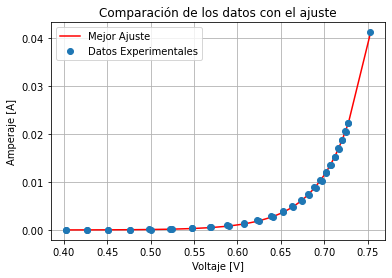

In [76]:
val_ini = [0.0035, 0.0095]
mej_val, cov = curve_fit(f = corriente, xdata= x , ydata= y, p0 = val_ini)
print('mej_val: {}'.format(mej_val))
print('-------------------')
print(cov)
print('-------------------')
perr = sqrt(diag(cov))
print(perr)

# Suponiendo que la función corriente toma x y los parámetros como un array
yaj = corriente(x, mej_val[0], mej_val[1])
plt.plot(x, yaj, 'r', label='Mejor Ajuste')
plt.plot(x, y, 'o', label='Datos Experimentales')
plt.xlabel('Voltaje [V]')
plt.ylabel('Amperaje [A]')
plt.title('Comparación de los datos con el ajuste')
plt.legend(loc='best')
plt.grid(True)
plt.show()


In [77]:
print('El valor de a es: {:.1e} ± {:.1e} '.format(mej_val[0],perr[0]))
print('El valor de b es: {:.1e} ± {:.1e} '.format(mej_val[1],perr[1]))

El valor de a es: 5.7e-10 ± 5.1e-11 
El valor de b es: 2.4e+01 ± 1.2e-01 


Evaluamos la constante de Boltzmann para cada medida y obtenemos los siguientes resultados:

In [78]:
df1['K_boltz'] = k_boltz(df1['Voltimetro[V]'], df1['Amperimetro[A]'], df1['T[K]'], mej_val[0])
df1['del_k_b']= del_k_boltz(df1['Voltimetro[V]'], df1['Amperimetro[A]'], df1['T[K]'], mej_val[0])
df1.head()

Fuente [V]  Voltímetro [mV]  Amperimetro [mA]  T[°C]    T[K]  \
0        0.400              402              0.01   28.8  301.95   
26       0.400              402              0.01   27.8  300.95   
27       0.425              427              0.01   27.8  300.95   
1        0.425              427              0.02   28.8  301.95   
2        0.450              451              0.04   28.8  301.95   

    Voltimetro[V]  Amperimetro[A]       K_boltz       del_k_b  
0           0.402         0.00001  1.092027e-23 -1.118010e-21  
26          0.402         0.00001  1.095655e-23 -1.121725e-21  
27          0.427         0.00001  1.163793e-23 -1.191486e-21  
1           0.427         0.00002  1.083071e-23 -5.176213e-22  
2           0.451         0.00004  1.072850e-23 -2.403802e-22

Hacemos su valor medio y su error:

In [79]:
# Imprimimos el valor de medio de  la constante de bolztmann y su incertidumbre
mean_value = mean(df1['K_boltz'])
err_value = mean(df1['del_k_b'])

print('El valor de la constante de Boltzmann obtenido es: {:.1e} ± {:.1e}'.format(mean_value, abs(err_value)))

El valor de la constante de Boltzmann obtenido es: 1.1e-23 ± 1.0e-22


In [41]:
from scipy.constants import Boltzmann as k
print('El valor de la constante de Boltzmann es: {:.1e}'.format(k))
print('El error relativo es: {:.1e}'.format(abs(mean_value - k)/k))

El valor de la constante de Boltzmann es: 1.4e-23
El error relativo es: 2.0e-01


Vemos que esta toma de datos nos da un valor más cercano que con los datos del primer diodo. Esto puede ser debido a la manipulación de los equipos, o a algún error en la toma de datos. Podemos ver que al realizar el experimento varias veces. Puede mejorar la técnica de toma de datos, y hallar con más precisión el valor de esta constante

Realizamos una gráfica de los residuos para cada valor:

In [80]:
# Calcular los residuos (diferencia entre los valores observados y los ajustados)
residuals = y - yaj

# Graficar los residuos
plt.figure(figsize=(10, 6))
plt.scatter(x, residuals, color='blue', label='Residuos')
plt.axhline(y=0, color='red', linestyle='--', label='Línea de Residuo Cero')
plt.title('Gráfica de Residuos')
plt.xlabel('Voltaje (V)')
plt.ylabel('Residuos')
plt.legend()
plt.grid(True)
plt.show()

Hacemos el test de chi cuadrado:

7
8.926408675551557e-06 0.04126
[8.92640868e-06 5.90193692e-03 1.17949474e-02 1.76879579e-02
 2.35809685e-02 2.94739790e-02 3.53669895e-02 4.12600000e-02]
[8.92640868e-06 5.90193692e-03 1.17949474e-02 1.76879579e-02
 2.35809685e-02 2.94739790e-02 3.53669895e-02 4.12600000e-02]
[28.  8.  8.  6.  0.  0.  1.]
[28.  8.  8.  6.  0.  0.  1.]
Chi cuadrado = 0.0
Chi cuadrado en log = -inf


C:\Users\Arturo\AppData\Local\Temp/ipykernel_27064/2231271554.py:30: RuntimeWarning: divide by zero encountered in log
  print('Chi cuadrado en log =', log(chi_sqr(n, naj)))


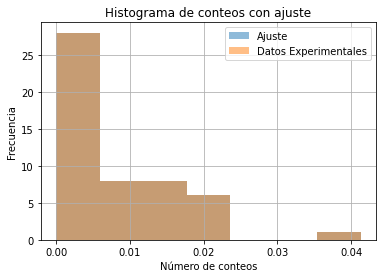

In [81]:
#Definimos el numero de intervalos para el test de chi cuadrado usando el criterio de Sturges
nbinm = int(1 + 3.322 * log10(101)) 
print(nbinm)

#Definimos un rango minimo y maximo comun para los datos obtenidos experimentamente y por medio del ajuste
yminm, ymaxm = min(min(y), min(yaj)), max(max(y), max(yaj))
print(yminm, ymaxm)

#Se hace el histograma dividiendo el rango definido arriba entre el numero de intervalos calculado previamente. Esto lo hace la funcion plt.hist automaticamente.
[naj, baj, paj] = plt.hist(yaj, nbinm, range=(yminm, ymaxm), alpha=0.5, label='Ajuste')
[n, b, p] = plt.hist(y, nbinm, range=(yminm, ymaxm), alpha=0.5, label='Datos Experimentales')
plt.xlabel('Número de conteos')
plt.ylabel('Frecuencia')
plt.title('Histograma de conteos con ajuste')
plt.legend(loc='best')
plt.grid(True)
print(b)
print(baj)
print(n)


def chi_sqr(dathistexp, dathistaj):
    mask = dathistaj != 0
    dathistexp = dathistexp[mask]
    dathistaj = dathistaj[mask]
    return sum(((dathistexp - dathistaj)**2) / dathistaj)

print(naj)
print('Chi cuadrado =', chi_sqr(n, naj))
print('Chi cuadrado en log =', log(chi_sqr(n, naj)))


plt.show()

Ahora, volvemos a realizar la conversion logaritmica para manipular los datos de esta manera:

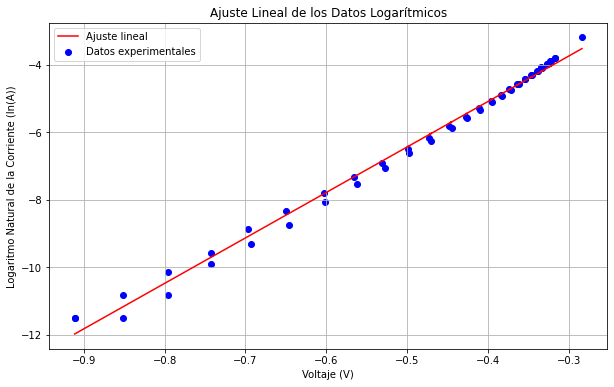

Slope (Pendiente): 13.48015060246107
Intercept (Intersección): 0.306042758769566
Coefficient of determination (r^2): 0.9934090678785
Standard error of the estimate (Error estándar del ajuste): 0.15685777984310645


In [82]:
# Calcular el logaritmo natural de las corrientes
ln_y = log(y)
x = log(x)

# Realizar una regresión lineal
slope, intercept, r_value, p_value, std_err = linregress(x, ln_y)
# Calcula el error estándar del intercepto
n = len(x)
intercept_stderr = std_err * sqrt(sum((x - mean(x))**2) / n)

# Crear una función para modelar el ajuste lineal
def model(x):
    return slope * x + intercept

# Calcular los valores ajustados de y para la línea de ajuste
fit_y = model(x)

# Graficar los datos y la línea de ajuste
plt.figure(figsize=(10, 6))
plt.scatter(x, ln_y, color='blue', label='Datos experimentales')
plt.plot(x, fit_y, color='red', label='Ajuste lineal')
plt.title('Ajuste Lineal de los Datos Logarítmicos')
plt.xlabel('Voltaje (V)')
plt.ylabel('Logaritmo Natural de la Corriente (ln(A))')
plt.legend()
plt.grid(True)
plt.show()

# Imprimir los resultados del ajuste
print(f"Slope (Pendiente): {slope}")
print(f"Intercept (Intersección): {intercept}")
print(f"Coefficient of determination (r^2): {r_value**2}")
print(f"Standard error of the estimate (Error estándar del ajuste): {std_err}")


Vemos que estos puntos son un poco más coherentes y lineales que el de las gráficas de los datos anteriores. Sin embargo, vimos también de que al hacer esta manipulación y encontrar la constante de boltzman, el error relativo era más grande:

In [83]:
a = [exp(intercept), exp(intercept)*intercept_stderr]
a

[1.3580403734418385, 0.037898031221223184]

In [84]:
df1 = pd.read_csv('csvs/Datos1_2exp.csv')
df2 = pd.read_csv('csvs/Datos2_2exp.csv')
df2 = pd.concat([df1, df2], ignore_index=True)
df2.sort_values(by='Fuente [V]', ascending=True, inplace=True)
df2['T[K]'] = df2['T[°C]'] + 273.15
df2['Voltimetro[V]'] = df2['Voltímetro [mV]']/1000
df2['Amperimetro[A]'] = df2['Amperimetro [mA]']/1000
df2.head()

Fuente [V]  Voltímetro [mV]  Amperimetro [mA]  T[°C]    T[K]  \
0        0.400              402              0.01   28.8  301.95   
26       0.400              402              0.01   27.8  300.95   
27       0.425              427              0.01   27.8  300.95   
1        0.425              427              0.02   28.8  301.95   
2        0.450              451              0.04   28.8  301.95   

    Voltimetro[V]  Amperimetro[A]  
0           0.402         0.00001  
26          0.402         0.00001  
27          0.427         0.00001  
1           0.427         0.00002  
2           0.451         0.00004

In [85]:
df2['K_boltz'] = k_boltz(df2['Voltimetro[V]'], df2['Amperimetro[A]'], df2['T[K]'], a[0])
df2['del_k_b']= del_k_boltz(df2['Voltimetro[V]'], df2['Amperimetro[A]'], df2['T[K]'], a = a[0], dela = a[1])
df2.head()

Fuente [V]  Voltímetro [mV]  Amperimetro [mA]  T[°C]    T[K]  \
0        0.400              402              0.01   28.8  301.95   
26       0.400              402              0.01   27.8  300.95   
27       0.425              427              0.01   27.8  300.95   
1        0.425              427              0.02   28.8  301.95   
2        0.450              451              0.04   28.8  301.95   

    Voltimetro[V]  Amperimetro[A]       K_boltz       del_k_b  
0           0.402         0.00001 -9.023850e-24 -7.635068e-22  
26          0.402         0.00001 -9.053834e-24 -7.660438e-22  
27          0.427         0.00001 -9.616884e-24 -8.136820e-22  
1           0.427         0.00002 -1.018219e-23 -4.575910e-22  
2           0.451         0.00004 -1.146902e-23 -2.748289e-22

In [86]:
# Imprimimos el valor de medio de  la constante de bolztmann y su incertidumbre
mean_value = mean(df2['K_boltz'])
err_value = mean(df2['del_k_b'])

print('El valor de la constante de Boltzmann obtenido es: {:.1e} ± {:.1e}'.format(mean_value, abs(err_value)))
print('El valor de la constante de Boltzmann es: {:.1e}'.format(k))
print('El error relativo es: {:.1e}'.format(abs(mean_value - k)/k))

El valor de la constante de Boltzmann obtenido es: -3.0e-23 ± 9.7e-23
El valor de la constante de Boltzmann es: 1.4e-23
El error relativo es: 3.2e+00


Como vemos, el error relativo creció mucho más que al hallar la constante de boltzmann sin usar la manipulación logarítmica.

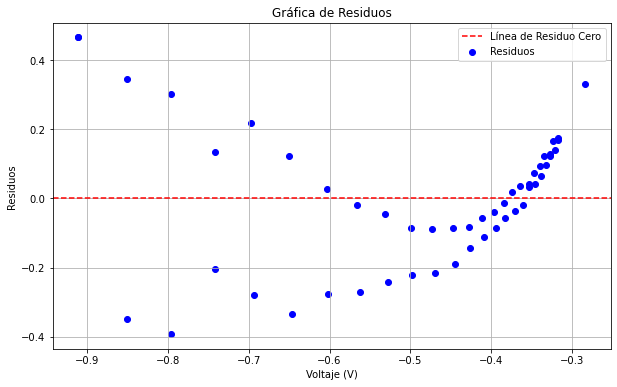

In [87]:
# Calcular los valores ajustados de y para los datos originales
fitted_y_values = model(x)

# Calcular los residuos (diferencia entre los valores observados y los ajustados)
residuals = ln_y - fitted_y_values

# Graficar los residuos
plt.figure(figsize=(10, 6))
plt.scatter(x, residuals, color='blue', label='Residuos')
plt.axhline(y=0, color='red', linestyle='--', label='Línea de Residuo Cero')
plt.title('Gráfica de Residuos')
plt.xlabel('Voltaje (V)')
plt.ylabel('Residuos')
plt.legend()
plt.grid(True)
plt.show()


In [88]:
#Definimos el numero de intervalos para el test de chi cuadrado usando el criterio de Sturges
nbinm = int(1 + 3.322 * log10(101)) 
print(nbinm)

#Definimos un rango minimo ln_y maximo comun para los datos obtenidos experimentamente ln_y por medio del ajuste
yminm, ymaxm = min(min(ln_y), min(fitted_y_values)), max(max(ln_y), max(fitted_y_values))
print(yminm, ymaxm)

#Se hace el histograma dividiendo el rango definido arriba entre el numero de intervalos calculado previamente. Esto lo hace la funcion plt.hist automaticamente.
[naj, baj, paj] = plt.hist(fitted_y_values, nbinm, range=(yminm, ymaxm), alpha=0.5, label='Ajuste')
[n, b, p] = plt.hist(ln_y, nbinm, range=(yminm, ymaxm), alpha=0.5, label='Datos Experimentales')
plt.xlabel('Número de conteos')
plt.ylabel('Frecuencia')
plt.title('Histograma de conteos con ajuste')
plt.legend(loc='best')
plt.grid(True)
print(b)
print(baj)
print(n)
print(naj)
print('Chi cuadrado =', chi_sqr(n, naj))

plt.show()

7
-11.978461491828485 -3.187861771339031
[-11.97846149 -10.72266153  -9.46686157  -8.21106161  -6.95526165
  -5.69946169  -4.44366173  -3.18786177]
[-11.97846149 -10.72266153  -9.46686157  -8.21106161  -6.95526165
  -5.69946169  -4.44366173  -3.18786177]
[ 5.  3.  4.  5.  7. 12. 15.]
[ 4.  4.  4.  4.  7. 15. 13.]
Chi cuadrado = 1.6576923076923078


Podemos ver que el ajuste se solapa bastante bien con los datos experimentales.

## Conclusiones

En este informe, se ha presentado un análisis detallado de los datos experimentales obtenidos en un experimento relacionado con la corriente y el voltaje en un circuito eléctrico. Se ha utilizado un modelo exponencial para ajustar los datos y se ha calculado la constante de Boltzmann, junto con su incertidumbre, utilizando diferentes métodos. Se ha realizado un análisis de los residuos para evaluar la calidad del ajuste y se han comparado los resultados obtenidos con el valor teórico de la constante de Boltzmann. En los datos del primer diodo se ha encontrado que el valor obtenido para la constante de Boltzmann es de 3.5e-23 J/K, el cual es distante del valor teórico de 1.38e-23 J/K. Esto puede deberse a errores en la toma de datos o en el ajuste de la curva exponencial. Se ha concluido que el ajuste no es perfecto y que se requiere una mayor precisión en la toma de datos y en el análisis de los mismos para obtener resultados más precisos. Para el segundo diodo, los datos tomados nos dieron un valor más cercano de 1.1e-23 J/K, y volvimos a comprobar que ajustar de forma linearizada, daba un valor aún más distante del que se esperaba. Por lo que en ambos casos, aunque en la primera toma de datos el error fue mayor, el ajuste exponencial da un valor más cercano de la constante de boltzman.

En el proceso de ajuste linealizado para los datos del primer diodo, se obtuvo un valor de la constante de Boltzmann de 3.5e-23 J/K, con un error relativo del 450%. Este ajuste fue peor que el ajuste exponencial, lo cual sugiere que el modelo exponencial es más adecuado para describir la relación entre la corriente y el voltaje en el circuito eléctrico. Se ha concluido que se requiere una mayor precisión en la toma de datos y en el análisis de los mismos para obtener resultados más precisos y confiables. 

De igual forma, en la segunda toma de datos, aunque el valor de la constante fue más aproximado, el error es de una cifra significativa más grande, lo que nos dice que probablemente necesitamos instrumentos más precisos para medir con más fidelidad la constante.



En el caso de los valores de chi cuadrado, el ajuste linealizado aparenta ser mejor pero es discutible por que estos ajustes estan relacionado a como se agrupan estos datos en ciertos bines, en ambos casos habian la misma cantidad de bines pero la escala en la que se distribuian son distintas. Por lo que no podemos concluir que un ajuste es mejor que el otro. Tanto asi que si le aplicamos el logaritmo al primer chi cuadrado, obtenemos un valor menor al segundo chi cuadrado. Lo cual esta deacuerdo a que el primer ajuste fue mejor que el segundo en ambos casos.

Para cerrar la conclusion, lo mas relevante es lo siguiente:
- El ajuste exponencial es mejor que el ajuste linealizado.
- Las graficas de los residuos nos sugieren ciertos patrones que existe variables a mejorar en la toma de datos.
- El valor de la constante de Boltzmann obtenido es distante al valor teorico, lo cual nos sugiere que hay errores en la toma de datos o en el ajuste de la curva exponencial. En ningun caso obtuvimos un error relativo menor al 100%.
- Hay que tener consideracion en como se agrupan los datos para el calculo de chi cuadrado, puesto que esto puede afectar el resultado final.

Bibliografía:

-William Shockley (Jul 1949). «The Theory of p-n Junctions in Semiconductors and p-n Junction Transistors». The Bell System Technical Journal.

-Neamen, D. A. (2018). Semiconductor Physics and Devices (4th ed.). McGraw-Hill Education.

-Saxena, A. K. (2003). Introduction to Semiconductor Theory. New Age International.

-Baliga, B. J. (2008). Fundamentals of Power Semiconductor Devices. Springer.